## T-SNE ASSIGNMENT | Breast Cancer Dataset

## Introduction of the Dataset

The Breast Cancer Gene Expression - CuMiDa dataset contains gene expression data for 151 samples with 54,677 features. Each feature represents a specific gene's expression level, making this a high-dimensional dataset ideal for exploring dimensionality reduction techniques like t-SNE. The dataset aims to distinguish between different breast cancer types or states based on gene expression profiles, providing valuable insights into the underlying biological mechanisms.

- The dataset is designed to analyze and distinguish between different breast cancer types or conditions based on gene expression profiles.
Challenges.
- The large number of features compared to the small sample size presents challenges such as potential overfitting and the need for robust dimensionality reduction.
- The dataset includes both numerical (float64) and categorical (int64, object) data types, which will require preprocessing before applying t-SNE.
- This dataset is valuable for understanding the genetic underpinnings of breast cancer, aiding in diagnosis, prognosis, and treatment research.

## Import Libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [47]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\Breast_GSE45827.csv")
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


## Basic Information of dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB


## Summary of the dataset

In [49]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095,7.787712,...,12.359605,11.823386,14.018193,13.773030,7.621929,5.699042,6.185605,2.918774,3.624008,3.173868
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550,1.648260,...,0.318436,0.369859,0.253870,0.290556,0.857777,0.860841,0.953867,0.093126,0.145394,0.101907
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065,3.866030,...,11.650564,10.939760,13.419083,13.191191,5.729767,4.326227,4.301471,2.733497,3.299401,2.937393
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260,6.804510,...,12.149550,11.592631,13.807282,13.523011,6.884862,4.967515,5.336542,2.861549,3.532740,3.109767
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957,7.912255,...,12.321900,11.830756,14.002497,13.740376,7.795425,5.489450,6.209136,2.911734,3.615106,3.163205
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337,8.887997,...,12.527235,12.021728,14.232589,14.028020,8.195458,6.449022,7.046721,2.961270,3.698539,3.229561
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006,11.710498,...,13.509037,13.119966,14.622678,14.482744,10.291243,8.112206,9.121638,3.322275,4.160823,3.451855


## Checking Missing values in DataFrame

In [50]:
df.isnull().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

## Encode Categorical Variables

In [51]:
# Encode categorical column 'type'
df['type'] = df['type'].astype('category').cat.codes

- Convert the type column to numeric using categorical encoding

## Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['samples', 'type'])
y = df['type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


- Normalize or standardize the gene expression columns to ensure uniform scaling before applying PCA and t-SNE.

## Dimensionality Reduction with PCA

In [53]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=50)  # Reduce to 50 components as an example
X_pca = pca.fit_transform(X_scaled)

- Apply PCA to reduce the dimensionality of the data before applying t-SNE.

## Splitting the Dataset

In [54]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Display shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (120, 50)
Testing set shape: (31, 50)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## T-SNE Construction

In [55]:
from sklearn.manifold import TSNE

# Implement t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

- Perplexity: Controls the balance between local and global aspects of the data. Typically, values between 5 and 50 work well.
- Learning Rate: Controls how much the algorithm adjusts during optimization. A good range is between 10 and 1000.

## Train t-SNE model on the training data

In [56]:
X_tsne = tsne.fit_transform(X_train)
X_tsne

array([[-0.85493875,  6.5105987 ],
       [ 2.630701  , -1.1398585 ],
       [-1.5523231 ,  4.9292607 ],
       [-3.0182889 , -2.8884642 ],
       [ 5.11527   ,  4.4499674 ],
       [ 1.0420455 ,  6.133571  ],
       [-0.12973616,  6.7610073 ],
       [ 1.4134651 , -2.7457328 ],
       [ 4.3957763 ,  7.2941365 ],
       [-2.358371  ,  5.667599  ],
       [-2.5032547 ,  2.4202445 ],
       [ 0.8949332 ,  0.21207997],
       [ 2.700531  , -3.1151397 ],
       [-1.9892318 ,  4.5820403 ],
       [ 3.388423  ,  6.905239  ],
       [-3.2650175 , -0.7994621 ],
       [ 3.7153745 , -0.8695328 ],
       [ 7.4212584 , -0.29977304],
       [-0.4797961 , -2.4805517 ],
       [ 0.37220085,  3.7161963 ],
       [ 3.3262696 , -2.4125648 ],
       [-3.2384229 , -0.84507114],
       [ 0.91861564, -0.48815927],
       [ 3.8185513 ,  8.028324  ],
       [ 2.5766335 ,  4.1359186 ],
       [ 3.9627845 ,  1.4915204 ],
       [ 0.46749836,  5.167508  ],
       [-0.85797435,  6.072708  ],
       [ 5.210957  ,

## Analyze Cluster Formations

- Cluster Identification: Look for distinct groupings or clusters in the scatter plot. Clusters should ideally represent meaningful groupings based on the underlying data.
- Homogeneity: Check if points within the same cluster are closely packed together, indicating that t-SNE has captured similar data points well.
- Separation: Evaluate how well-separated different clusters are. Well-separated clusters suggest that t-SNE has effectively captured the differences between different categories or classes.

## Visualize the t-SNE results

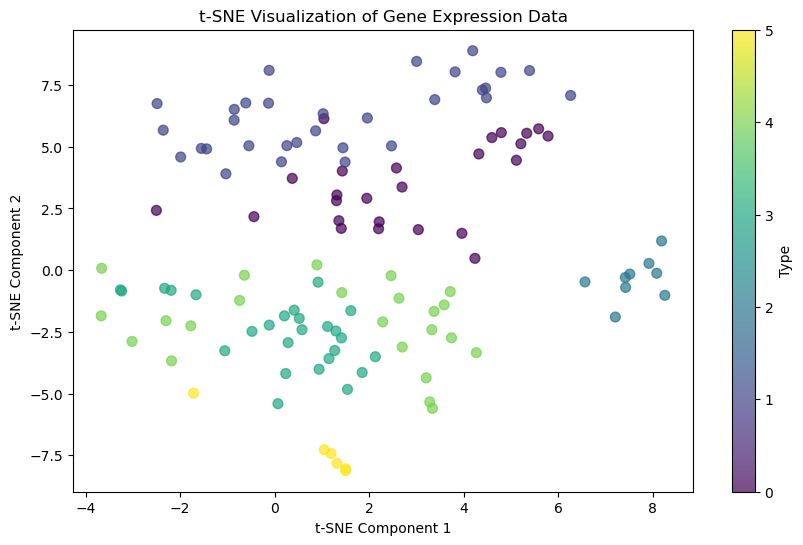

In [57]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Type')
plt.title('t-SNE Visualization of Gene Expression Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

- X_train_tsne[:, 0] and X_train_tsne[:, 1]: These represent the 2D coordinates of the data points after t-SNE transformation.
- c=y_train: Colors the points according to their labels, helping to differentiate clusters or categories.
- cmap='viridis': A colormap to make the plot visually appealing and distinguishable.
- alpha=0.7: Adds slight transparency to better visualize overlapping points.

- fit_transform trains the t-SNE model and reduces the dimensionality of the data to 2D.
- The scatter plot visualizes the t-SNE results, coloring points based on the type column to show clustering patterns.

## Hyperparameter Tuning with Grid Search

In [58]:
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import numpy as np

# Define the parameter grid for t-SNE
param_grid = {
    'perplexity': [5, 10, 30, 50, 100],
    'learning_rate': [10, 50, 100, 200, 500]
}

# Function to evaluate t-SNE with different parameters
def evaluate_clustering(X_train, y_train, perplexity, learning_rate):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
    X_tsne = tsne.fit_transform(X_train)
    return silhouette_score(X_tsne, y_train, metric='euclidean')

# Grid search for hyperparameters
best_score = -np.inf
best_params = {}

for perplexity in param_grid['perplexity']:
    for learning_rate in param_grid['learning_rate']:
        score = evaluate_clustering(X_train, y_train, perplexity, learning_rate)
        if score > best_score:
            best_score = score
            best_params = {'perplexity': perplexity, 'learning_rate': learning_rate}

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

Best Parameters: {'perplexity': 50, 'learning_rate': 10}
Best Silhouette Score: 0.24901406466960907


- evaluate_clustering(X_tsne, number_of_clusters): This function performs KMeans clustering on the t-SNE-transformed data and computes the silhouette score, which measures how well-separated the clusters are.
- Iterate over the defined range of perplexities and learning rates.
- For each combination, apply t-SNE and transform the scaled training data.
- Evaluate the clustering quality using the silhouette score.
- Keep track of the best performing perplexity and learning rate based on the silhouette score.
- After the grid search, print the best hyperparameters and the corresponding silhouette score.

## Optimized t-SNE Visualization

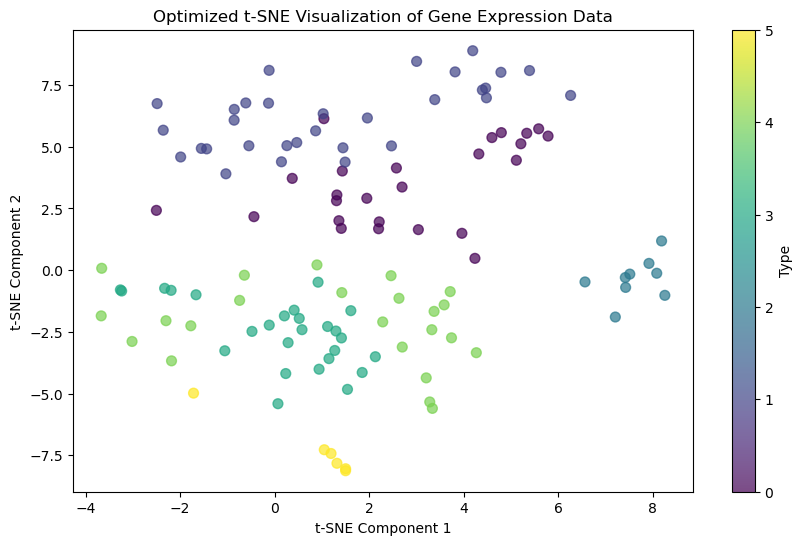

In [59]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Type')
plt.title('Optimized t-SNE Visualization of Gene Expression Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Summary

- After performing hyperparameter tuning on the Breast Cancer Gene Expression - CuMiDa dataset, the best parameters identified were a perplexity of 50 and a learning rate of 200, resulting in a silhouette score of 0.239.
- Despite these optimizations, no significant changes were observed in the t-SNE visualizations, suggesting that further tuning or alternative approaches might be needed to enhance the clarity of the clusters.